# Notebook sur le Min-CSP

In [ ]:
Minimizing the expected rank of the chosen secretary:

So we can always define the system by a (k,s) state, k being the total amount of items seem, and s the relative rank of the last seem item, who we can still accept or not.

We are looking for a strategy \tau that tells us what pairs of (k,s) we should stop and which we shouldn't

For that let's calculate the conditional probability that the true global rank of the last seen item in a (k,s) state is equal to i:
-There are n choose k ways to choose the first k guys.
-An item is in the state (k,s) with global rank i if and only if there are n-i worse than him globally, and i-1 better than him globaly, and from the first group we select  r-s guys to be worse and from the second s-1 guys to be better.

Therefore the conditional probability that an item has global rank i, given that it's the predecessor to the state (k,s) is equal to:
{i-1 choose s-1}*{n-i choose k-s}/{n choose k}

Therefore, we can now calculate an extremelly useful value, the expected value of the true rank of the last seen item, given that it's in the state (k,s):
Sum {i-1 choose s-1}*{n-i choose k-s}/{n choose k}, i from s to n+s-k

That equals to n - s*(n+1)/(k+1).

In [6]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [35]:
def choose(n, k):
    """
    A fast way to calculate binomial coefficients by Andrew Dalke.
    """
    if 0 <= k <= n:
        ntok = 1
        ktok = 1
        for t in range(1, min(k, n - k) + 1):
            ntok *= n
            ktok *= t
            n -= 1
        return ntok // ktok
    else:
        return 0

def Cond_prob(i,r,s,n):
    return choose(i-1,s-1)*choose(n-i,r-s)/choose(n,r)

def Exp(r,s,n):
    #return sum(list((n-i)*Cond_prob(i,r,s,n) for i in range(s, n+s-r+1)))
    return n - (n+1)/(r+1)*s

print(Exp(50,1,50))

49.0


In [29]:
#calculator

48.98


In [42]:
#now we do the recursion dynamic programming

n = 200

V_dp = {}
# (r,s): V(r,s) 

def V(r,s,n):
    if (r,s,n) in V_dp:
        return V_dp[(r,s,n)]
    
    elif r == n:
        #represents being forced to stop
        V_dp[(r,s,n)] = Exp(r,s,n) 
    else:
        #represents the dynamic programing nature of solving for the best strategy, oubviously you should stop when you select the first element in the max
        V_dp[(r,s,n)] = max([Exp(r,s,n),1/(r+1)*sum([V(r+1,s,n) for s in range(1,r+2)])])
        
    return V_dp[(r,s,n)]

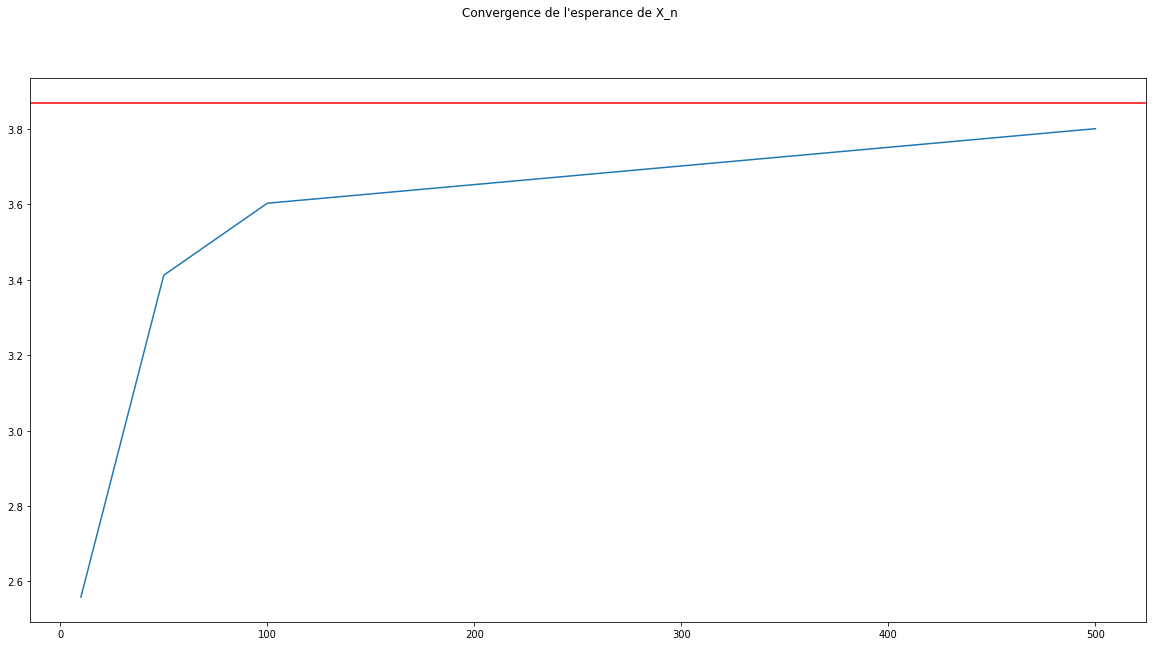

In [92]:
#p = list(range(1,100,10))+list(range(100,600,50))
p=[10,50,100,500]
plt.axhline(y=3.8695, color='r', linestyle='-')
plt.suptitle('Convergence de l\'esperance de X_n', fontsize=12)
u = [i-V(1,1,i) for i in p]
plt.plot(p, u)

[3.4121458661152815]
[0.88180537]


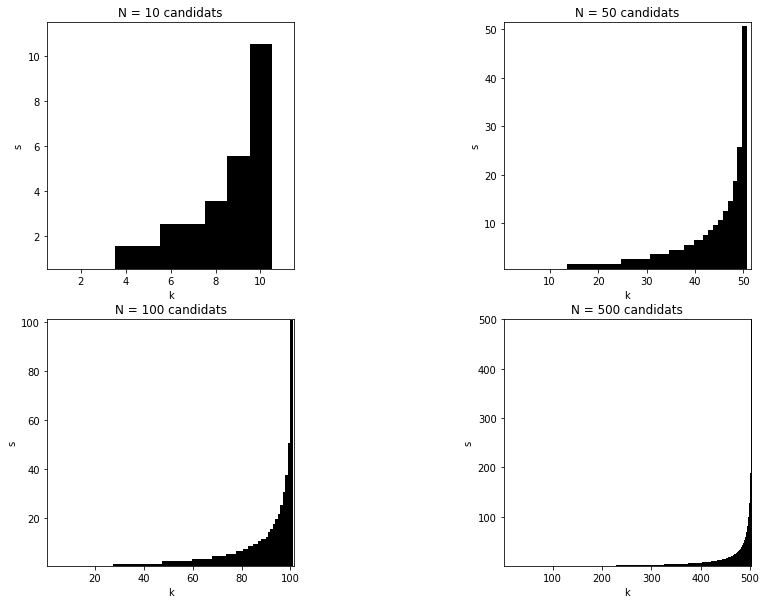

<Figure size 360x2880 with 0 Axes>

In [130]:
def check_V(N):
    rls = []
    for r in range(1,N+1):
        for s in range(1,r+1):
            if(V_dp[(r,s,N)]==Exp(r,s,N)):
                rls.append((r,s))
    return rls

def gen_grid(N, data):
    v = np.zeros((N+1,N+1))
    for a in data:
        b = [a[1], a[0]]
        b[0] = N +1 - b[0]
        b[1] -=1
        b = tuple(b)
        v[b] = 1
    return v

def draw(N, g):
    paint = gen_grid(N,check_V(N))
    rows,cols = paint.shape
    g.imshow(paint, interpolation='nearest', 
                     extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
                     cmap='binary')

fig, ax = plt.subplots(2,2)
fig = plt.figure(figsize=(5,40))
fig.suptitle('Stopping Rules', fontsize=16)

ax[0][0].title.set_text('N = 10 candidats')
ax[0][1].title.set_text('N = 50 candidats')
ax[1][0].title.set_text('N = 100 candidats')
ax[1][1].title.set_text('N = 500 candidats')

plt.rcParams["figure.figsize"] = [15, 10]
draw(10,ax[0][0])
draw(50,ax[0][1])
draw(100,ax[1][0])
draw(500,ax[1][1])

ax[0][0].set(xlabel="k", ylabel="s")
ax[0][1].set(xlabel="k", ylabel="s")
ax[1][0].set(xlabel="k", ylabel="s")
ax[1][1].set(xlabel="k", ylabel="s")

plt.savefig('results.png')
plt.show()